In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to be (samples, timesteps, features)
x_train = x_train.reshape((x_train.shape[0], 28, 28))  # 28 timesteps, 28 features
x_test = x_test.reshape((x_test.shape[0], 28, 28))  # 28 timesteps, 28 features

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the RNN model
model = models.Sequential()

# Add RNN layers
model.add(layers.SimpleRNN(128, input_shape=(28, 28), activation='relu'))  # 128 units
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


C:\Users\VINAYAK\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.7237 - loss: 0.8079 - val_accuracy: 0.9416 - val_loss: 0.1982
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9384 - loss: 0.2043 - val_accuracy: 0.9591 - val_loss: 0.1434
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9546 - loss: 0.1556 - val_accuracy: 0.9606 - val_loss: 0.1262
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9622 - loss: 0.1307 - val_accuracy: 0.9651 - val_loss: 0.1159
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9638 - loss: 0.1240 - val_accuracy: 0.9702 - val_loss: 0.1053
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9670 - loss: 0.1217
Test accuracy: 0.9702


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.4634 - val_loss: 0.3338
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2803 - val_loss: 0.1445
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0960 - val_loss: 0.0184
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0088 - val_loss: 0.0046
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0011 - val_loss: 7.8737e-04
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.1114e-04 - val_loss: 3.7644e-04
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3.6062e-04 - val_loss: 1.9154e-04
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.6191e-04 - val_loss: 1.1820e-04
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1603e-04 - val_loss: 9.0391e-05
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.0106e-05 - val_loss: 7.7714e-05
Epoch 12/20
12/12 ━

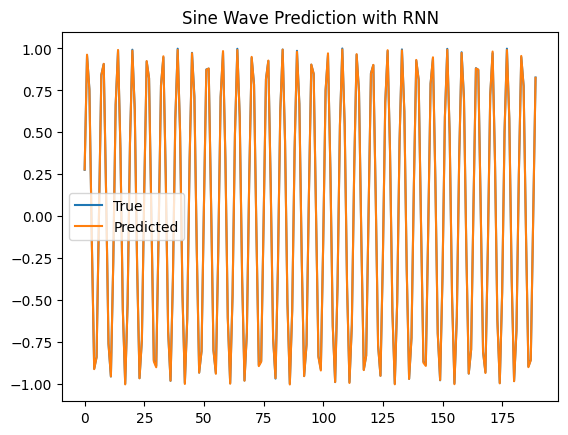

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Generate a simple sine wave dataset
def generate_sine_wave(seq_length=50, num_samples=1000):
    x_data = np.linspace(0, num_samples, num_samples)
    y_data = np.sin(x_data)

    X = []
    y = []

    for i in range(num_samples - seq_length):
        X.append(y_data[i:i+seq_length])
        y.append(y_data[i+seq_length])

    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Generate data
seq_length = 50
X, y = generate_sine_wave(seq_length=seq_length, num_samples=1000)

# Reshape data to be compatible with RNN (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the RNN model
model = models.Sequential()

# Add RNN layer
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))

# Add a Dense layer for regression output
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Predict on test data
y_pred = model.predict(X_test)

# Plot results
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Sine Wave Prediction with RNN')
plt.show()
